In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Create Dataset

In [3]:
# Generate 1000 data points with some noise
# 2D binary classification dataset consisting of points arranged in a large circle containing a smaller circle
# X represents featues (when we draw circle in 2-d ,it has 2 coordinates x,y hence 2 features )
# y represents labels in the class i.e 0 or 1
# X and y will be arrays
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [4]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 2)
Shape of y: (1000,)


# Visualize Data

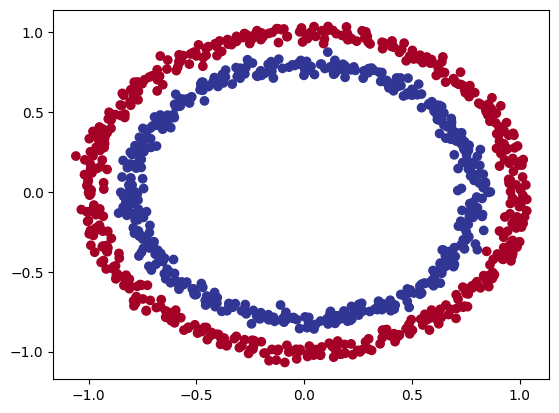

In [5]:
#Plot data points belonging to each label individually
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Train Test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model

In [8]:
from torch import nn

In [9]:
class circleDataModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Always Start with minimum layers 
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self,X):
        return self.layer2(self.layer1(X))
        

# Instantiate your Model

In [10]:
model0 = circleDataModel()

In [11]:
model0

circleDataModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.4500, -0.2597],
                      [-0.4196,  0.1720],
                      [ 0.4603, -0.1161],
                      [-0.0917,  0.1759],
                      [ 0.6764,  0.0275]])),
             ('layer1.bias',
              tensor([-0.3985, -0.0232,  0.2445,  0.3150, -0.3835])),
             ('layer2.weight',
              tensor([[-0.1174,  0.3596, -0.2868,  0.3158, -0.1506]])),
             ('layer2.bias', tensor([-0.1485]))])

In [13]:
# Converting  numpy arrays to tensor data
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()


In [14]:
# Simple Mode
y_pred = model0(X_test)

In [15]:
# inference mode
with torch.inference_mode():
    y_preds = model0(X_test)
    

y_preds

tensor([[ 0.2334],
        [ 0.1415],
        [ 0.1750],
        [ 0.2511],
        [-0.2998],
        [-0.3522],
        [-0.2345],
        [-0.3513],
        [ 0.1951],
        [ 0.1301],
        [ 0.2862],
        [ 0.1836],
        [-0.3081],
        [ 0.0864],
        [ 0.2625],
        [-0.3134],
        [-0.0406],
        [ 0.3503],
        [ 0.2806],
        [ 0.3602],
        [ 0.1474],
        [-0.4260],
        [ 0.2940],
        [ 0.3910],
        [-0.1207],
        [-0.2812],
        [-0.1089],
        [-0.4254],
        [ 0.2925],
        [ 0.0156],
        [-0.1607],
        [-0.0915],
        [ 0.2743],
        [-0.1936],
        [ 0.3084],
        [ 0.0717],
        [ 0.2185],
        [ 0.1157],
        [-0.1335],
        [ 0.0541],
        [ 0.3055],
        [ 0.2414],
        [-0.0498],
        [-0.3308],
        [ 0.2854],
        [ 0.0481],
        [-0.3609],
        [ 0.1633],
        [ 0.0899],
        [-0.3305],
        [ 0.2573],
        [ 0.2861],
        [-0.

# Notes

# This Output is raw unnormalized data called logits
# Apply activation function to it(Sigmid for Binary & Softmax for multiclass) to get probability distribution over your class

# logits can be negative but probability can't be negative

In [16]:
# Applying sigmoid it gives the probability of each datapoint belonging to the Binary value in class
y_preds= torch.sigmoid(y_preds)
y_preds

tensor([[0.5581],
        [0.5353],
        [0.5436],
        [0.5625],
        [0.4256],
        [0.4128],
        [0.4416],
        [0.4131],
        [0.5486],
        [0.5325],
        [0.5711],
        [0.5458],
        [0.4236],
        [0.5216],
        [0.5652],
        [0.4223],
        [0.4899],
        [0.5867],
        [0.5697],
        [0.5891],
        [0.5368],
        [0.3951],
        [0.5730],
        [0.5965],
        [0.4699],
        [0.4302],
        [0.4728],
        [0.3952],
        [0.5726],
        [0.5039],
        [0.4599],
        [0.4771],
        [0.5682],
        [0.4518],
        [0.5765],
        [0.5179],
        [0.5544],
        [0.5289],
        [0.4667],
        [0.5135],
        [0.5758],
        [0.5601],
        [0.4876],
        [0.4181],
        [0.5709],
        [0.5120],
        [0.4107],
        [0.5407],
        [0.5225],
        [0.4181],
        [0.5640],
        [0.5710],
        [0.3976],
        [0.4275],
        [0.4401],
        [0

In [17]:
y_preds = torch.round(y_preds) # we are rounding it so that we can get the output in terms of 0 or 1
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
      

# Classification performance metrices are accuracy,preceision,recall,f1score,confusion matrix etc

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_preds)
score

0.505

# Notes

In [19]:
# Model has 21 Trainable parameters 
# 15 weights and 6 Bias
# Layer 1 : 2 Neurons -> each neuron further connected to 5 neurons of Hidden layer -> Hence 10 Weights 5 Bias
# Layer 2 : 5 Neurons -> each neuron further connected to 1 neuron of o/p layer -> Hence 5 Weight  1 Bias
# Weight : Connection String of each neuron to the neuron of next layer
# Bias : No of Neurons in next Layer , I/P Layer has no bias

In [20]:
# loss function choosing
loss_fxn = nn.BCEWithLogitsLoss()

# optimizer function choosing
optimizer_fn = torch.optim.SGD(params=model0.parameters(), lr=0.1)

# Training and Testing Loop

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
epoches = 1000
torch.manual_seed(42)
epochs = []
training_loss_list = []
testing_loss_list = []
for epoch in range(epoches):
    epochs.append(epoch)
    # Step 1 Put model in training mode
    model0.train()
    # Step 2 Forward Pass
    y_trained_logits = model0(X_train).squeeze()
    y_pred_training = torch.round(torch.sigmoid(y_trained_logits))
    # Step 3  Loss Function
    training_loss = loss_fxn(y_trained_logits, y_train) #BCElogits loss fxn taken raw unnormalized data
    
    training_loss_list.append(training_loss.item())
    #print(f"training_loss:{training_loss}")

    
    training_score = accuracy_score(y_train.detach().numpy(), y_pred_training.detach().numpy())
    training_accuracy = training_score *100
    #print(f"training_accuracy:{training_score}")
    # Step 4. Optimizer Zero Grad
    optimizer_fn.zero_grad()
    # Step 5. Back propagation w.r.t parameters of the model
    training_loss.backward()
    # Step 6. Setup Optimizer | make a calculation of how to change the parameters w.r.t back propagation of loss
    optimizer_fn.step()
    #if(epoch % 10 == 0):
    # TESTING/Evaluation . 
    model0.eval()
    with torch.inference_mode():
        # Step 1
        y_testing_logits = model0(X_test).squeeze()
        y_preds_testing = torch.round(torch.sigmoid(y_testing_logits))
        # Step 2
        testing_loss = loss_fxn(y_testing_logits, y_test)

        testing_loss_list.append(testing_loss.item())
        testing_score = accuracy_score(y_test.detach().numpy(), y_preds_testing.detach().numpy())
        testing_accuracy = testing_score * 100
        #print(f"testing_accuracy:{testing_score}")

    if(epoch%10==0):
        print(f'Epoch: {epoch} | Training_Loss: {training_loss:.5f} | Training_Accuracy:{training_accuracy:.5f}% | Testing_Loss: {testing_loss:.5f} | Test_Accuracy: {testing_accuracy:.5f}%')
    

Epoch: 0 | Training_Loss: 0.70151 | Training_Accuracy:50.25000% | Testing_Loss: 0.70055 | Test_Accuracy: 50.50000%
Epoch: 10 | Training_Loss: 0.69951 | Training_Accuracy:49.75000% | Testing_Loss: 0.69928 | Test_Accuracy: 51.00000%
Epoch: 20 | Training_Loss: 0.69805 | Training_Accuracy:49.62500% | Testing_Loss: 0.69841 | Test_Accuracy: 50.50000%
Epoch: 30 | Training_Loss: 0.69697 | Training_Accuracy:49.25000% | Testing_Loss: 0.69781 | Test_Accuracy: 54.00000%
Epoch: 40 | Training_Loss: 0.69615 | Training_Accuracy:49.25000% | Testing_Loss: 0.69739 | Test_Accuracy: 51.50000%
Epoch: 50 | Training_Loss: 0.69553 | Training_Accuracy:49.50000% | Testing_Loss: 0.69710 | Test_Accuracy: 51.50000%
Epoch: 60 | Training_Loss: 0.69505 | Training_Accuracy:49.00000% | Testing_Loss: 0.69689 | Test_Accuracy: 51.50000%
Epoch: 70 | Training_Loss: 0.69468 | Training_Accuracy:49.75000% | Testing_Loss: 0.69675 | Test_Accuracy: 49.50000%
Epoch: 80 | Training_Loss: 0.69439 | Training_Accuracy:50.00000% | Testin

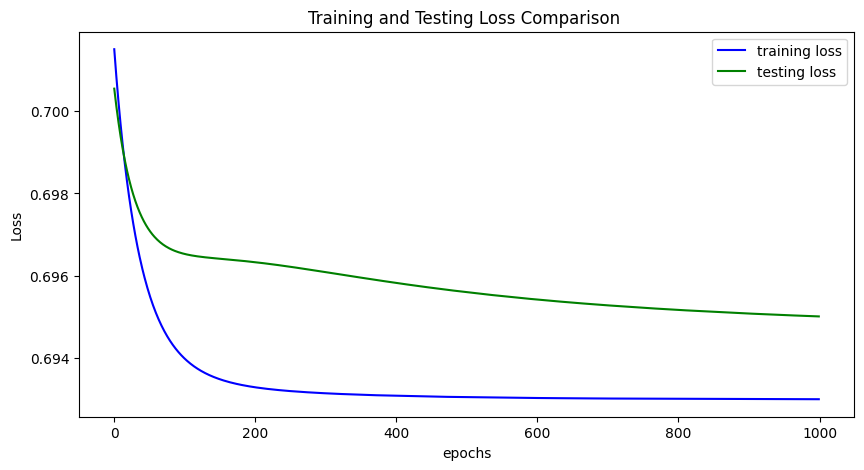

In [23]:
plt.figure(figsize=(10,5))
plt.title("Training and Testing Loss Comparison ")
plt.plot(training_loss_list, c="b" , label="training loss")
plt.plot(testing_loss_list,c="g", label="testing loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
            
    
   

In [24]:
import numpy as np

# Helper Function

In [25]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

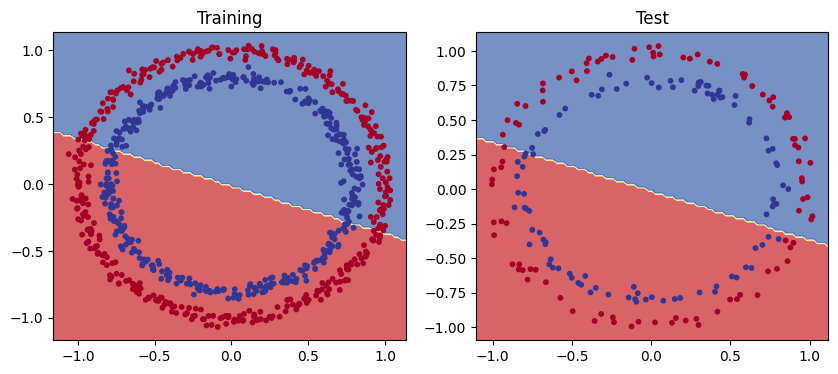

In [26]:
# observation: model is not learning anything
plt.figure(figsize=(10,4))
# 1st plot at left side
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model0, X_test, y_test)

# Improvement in models

In [27]:
# FROM MODELS PERSPECTIVE
# 1.ADD MORE LAYERS (GIVE MODEL MORE CHANCE TO LEARN) | FROM 2 TO 5 LAYERS |
# 2.ADD MORE HIDDEN UNITS(NEURONS) | FROM 5 TO 10
# 3.ADD MORE EPOCHES | FROM 10 TO 100
# 4.Change/add the activation function
# 5.Change the learning rate (choose wisely leage cause overfitting small cause undefitting) | also cause vanishing gradient (gradient become zero too quickly)
# 6.Change loss function

In [28]:
# Build Model again

In [29]:
# change in no of layers only
class CircleModel_01(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, X):
        return self.layer3(self.layer2(self.layer1(X)))



In [30]:
model_01 = CircleModel_01()

In [31]:
model_01.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

# Loss function and optimizers

In [32]:

loss_fn = nn.BCEWithLogitsLoss() # this loss is combines sigmoid and BCE loss in 1 single class
optimizer_fn = torch.optim.SGD(params=model_01.parameters(), lr=0.1)

# Training and Testing loop

In [33]:
epoches = 1000
torch.manual_seed(42)
epochs = []
training_loss_list = []
testing_loss_list = []
for epoch in range(epoches):
    epochs.append(epoch)
    # Step 1 Put model in training mode
    model_01.train()
    # Step 2 Forward Pass
    y_trained_logits = model_01(X_train).squeeze()
    y_pred_training = torch.round(torch.sigmoid(y_trained_logits))
    # Step 3  Loss Function
    training_loss = loss_fxn(y_trained_logits, y_train) #BCElogits loss fxn taken raw unnormalized data
    
    training_loss_list.append(training_loss.item())
    #print(f"training_loss:{training_loss}")

    
    training_score = accuracy_score(y_train.detach().numpy(), y_pred_training.detach().numpy())
    training_accuracy = training_score *100
    #print(f"training_accuracy:{training_score}")
    # Step 4. Optimizer Zero Grad
    optimizer_fn.zero_grad()
    # Step 5. Back propagation w.r.t parameters of the model
    training_loss.backward()
    # Step 6. Setup Optimizer | make a calculation of how to change the parameters w.r.t back propagation of loss
    optimizer_fn.step()
    #if(epoch % 10 == 0):
    # TESTING/Evaluation . 
    model_01.eval()
    with torch.inference_mode():
        # Step 1
        y_testing_logits = model_01(X_test).squeeze()
        y_preds_testing = torch.round(torch.sigmoid(y_testing_logits))
        # Step 2
        testing_loss = loss_fxn(y_testing_logits, y_test)

        testing_loss_list.append(testing_loss.item())
        testing_score = accuracy_score(y_test.detach().numpy(), y_preds_testing.detach().numpy())
        testing_accuracy = testing_score * 100
        #print(f"testing_accuracy:{testing_score}")

    if(epoch%10==0):
        print(f'Epoch: {epoch} | Training_Loss: {training_loss:.5f} | Training_Accuracy:{training_accuracy:.5f}% | Testing_Loss: {testing_loss:.5f} | Test_Accuracy: {testing_accuracy:.5f}%')
    

Epoch: 0 | Training_Loss: 0.69396 | Training_Accuracy:50.87500% | Testing_Loss: 0.69261 | Test_Accuracy: 51.00000%
Epoch: 10 | Training_Loss: 0.69369 | Training_Accuracy:50.25000% | Testing_Loss: 0.69270 | Test_Accuracy: 50.00000%
Epoch: 20 | Training_Loss: 0.69351 | Training_Accuracy:50.12500% | Testing_Loss: 0.69283 | Test_Accuracy: 49.50000%
Epoch: 30 | Training_Loss: 0.69339 | Training_Accuracy:50.50000% | Testing_Loss: 0.69297 | Test_Accuracy: 48.00000%
Epoch: 40 | Training_Loss: 0.69329 | Training_Accuracy:50.37500% | Testing_Loss: 0.69310 | Test_Accuracy: 49.00000%
Epoch: 50 | Training_Loss: 0.69322 | Training_Accuracy:49.87500% | Testing_Loss: 0.69324 | Test_Accuracy: 50.00000%
Epoch: 60 | Training_Loss: 0.69317 | Training_Accuracy:49.37500% | Testing_Loss: 0.69336 | Test_Accuracy: 51.50000%
Epoch: 70 | Training_Loss: 0.69312 | Training_Accuracy:49.37500% | Testing_Loss: 0.69348 | Test_Accuracy: 50.50000%
Epoch: 80 | Training_Loss: 0.69309 | Training_Accuracy:50.12500% | Testin

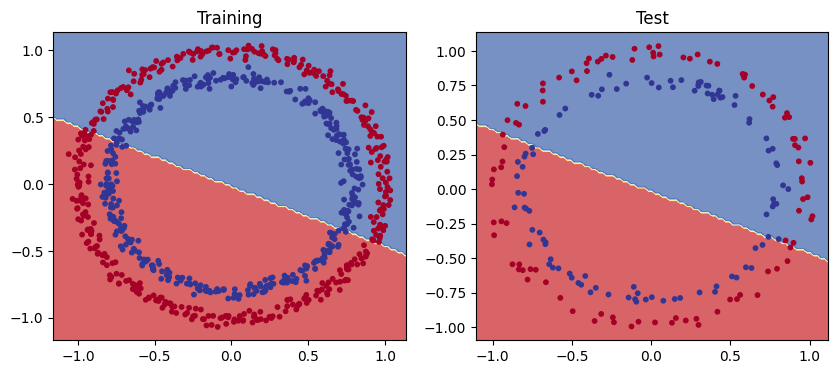

In [34]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_01, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_01, X_test, y_test)

# By adding Linear Layer Model is not learning anything
# Try Adding  Activation function

In [35]:
class CircleModel_02(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=8)
        self.layer2 = nn.Linear(in_features=8, out_features=8)
        self.layer3 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, X):
       
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(X)))))

model_02 = CircleModel_02()

In [36]:
model_02

CircleModel_02(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [37]:
# Introdice loss fn and optimizers
loss_fn = nn.BCEWithLogitsLoss() # this loss is combines sigmoid and BCE loss in 1 single class
optimizer_fn = torch.optim.SGD(params=model_02.parameters(), lr=0.1)

In [38]:
# Training and Testing loop
epoches = 1000
torch.manual_seed(42)
epochs = []
training_loss_list = []
testing_loss_list = []
for epoch in range(epoches):
    epochs.append(epoch)
    # Step 1 Put model in training mode
    model_02.train()
    # Step 2 Forward Pass
    y_trained_logits = model_02(X_train).squeeze()
    y_pred_training = torch.round(torch.sigmoid(y_trained_logits))
    # Step 3  Loss Function
    training_loss = loss_fxn(y_trained_logits, y_train) #BCElogits loss fxn taken raw unnormalized data
    
    training_loss_list.append(training_loss.item())
    #print(f"training_loss:{training_loss}")

    
    training_score = accuracy_score(y_train.detach().numpy(), y_pred_training.detach().numpy())
    training_accuracy = training_score *100
    #print(f"training_accuracy:{training_score}")
    # Step 4. Optimizer Zero Grad
    optimizer_fn.zero_grad()
    # Step 5. Back propagation w.r.t parameters of the model
    training_loss.backward()
    # Step 6. Setup Optimizer | make a calculation of how to change the parameters w.r.t back propagation of loss
    optimizer_fn.step()
    #if(epoch % 10 == 0):
    # TESTING/Evaluation . 
    model_02.eval()
    with torch.inference_mode():
        # Step 1
        y_testing_logits = model_02(X_test).squeeze()
        y_preds_testing = torch.round(torch.sigmoid(y_testing_logits))
        # Step 2
        testing_loss = loss_fxn(y_testing_logits, y_test)

        testing_loss_list.append(testing_loss.item())
        testing_score = accuracy_score(y_test.detach().numpy(), y_preds_testing.detach().numpy())
        testing_accuracy = testing_score * 100
        #print(f"testing_accuracy:{testing_score}")

    if(epoch%10==0):
        print(f'Epoch: {epoch} | Training_Loss: {training_loss:.5f} | Training_Accuracy:{training_accuracy:.5f}% | Testing_Loss: {testing_loss:.5f} | Test_Accuracy: {testing_accuracy:.5f}%')
    

Epoch: 0 | Training_Loss: 0.69265 | Training_Accuracy:50.00000% | Testing_Loss: 0.69001 | Test_Accuracy: 50.00000%
Epoch: 10 | Training_Loss: 0.69203 | Training_Accuracy:49.87500% | Testing_Loss: 0.68944 | Test_Accuracy: 53.50000%
Epoch: 20 | Training_Loss: 0.69167 | Training_Accuracy:50.87500% | Testing_Loss: 0.68911 | Test_Accuracy: 54.00000%
Epoch: 30 | Training_Loss: 0.69144 | Training_Accuracy:49.37500% | Testing_Loss: 0.68888 | Test_Accuracy: 53.00000%
Epoch: 40 | Training_Loss: 0.69126 | Training_Accuracy:49.75000% | Testing_Loss: 0.68869 | Test_Accuracy: 53.00000%
Epoch: 50 | Training_Loss: 0.69111 | Training_Accuracy:49.87500% | Testing_Loss: 0.68851 | Test_Accuracy: 54.50000%
Epoch: 60 | Training_Loss: 0.69097 | Training_Accuracy:50.37500% | Testing_Loss: 0.68835 | Test_Accuracy: 55.00000%
Epoch: 70 | Training_Loss: 0.69083 | Training_Accuracy:50.37500% | Testing_Loss: 0.68818 | Test_Accuracy: 55.50000%
Epoch: 80 | Training_Loss: 0.69070 | Training_Accuracy:50.62500% | Testin

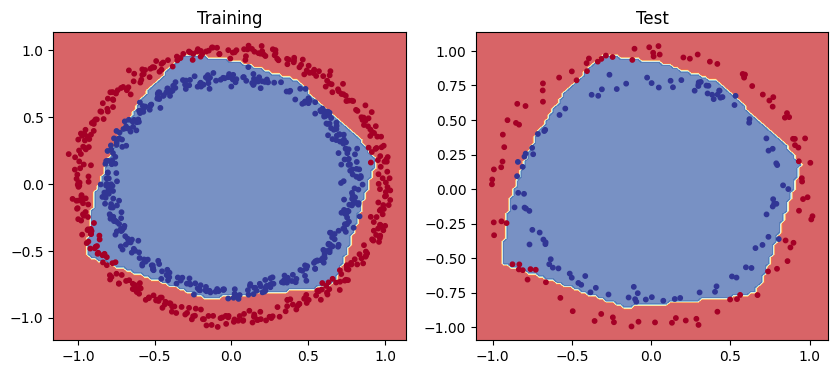

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_02, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_02, X_test, y_test)

In [40]:
model_01.parameters()

<generator object Module.parameters at 0x000002BE6AC3AAB0>

In [41]:
model_02.parameters()

<generator object Module.parameters at 0x000002BE6AC3AC70>